In [37]:
%%time
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('experiment-b/all-scores-b.csv')

s = 'experiment-b/runs'
find = os.popen(f"find {s}").read().split('\n')
runs = [i for i in find if os.path.isdir(i) and re.search('[A-Z]{25}', i) is not None]

creation = pd.Series({i.split('/')[-1]:os.path.getmtime(i) for i in runs}, name='creation')
df = df.join(mts, on='gene')

CPU times: user 740 ms, sys: 610 ms, total: 1.35 s
Wall time: 1.79 s


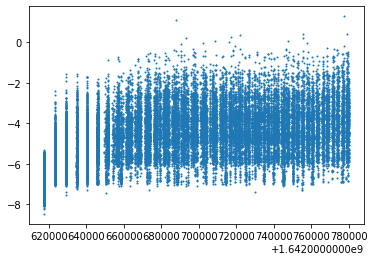

In [38]:
plt.scatter(df.creation,
            df.score,
            s=1,
           )
plt.show()

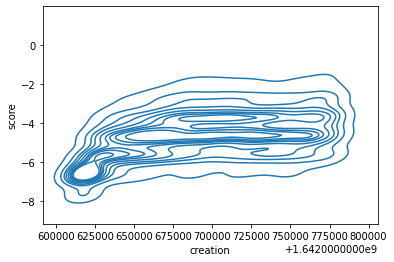

CPU times: user 21.9 s, sys: 26 ms, total: 21.9 s
Wall time: 20.2 s


In [39]:
%%time
sns.kdeplot(x=df.creation,
            y=df.score,
           )
plt.show()